In [1]:
!pip install p_tqdm

     |████████████████████████████████| 81 kB 10.9 MB/s 
     |████████████████████████████████| 65 kB 4.9 MB/s 
  Created wheel for p-tqdm: filename=p_tqdm-1.3.3-py3-none-any.whl size=3987 sha256=49ed91db618b4208ae20ddcd9a6c434eebc62c449bb38511ae5ff53df25952b5
  Stored in directory: /root/.cache/pip/wheels/57/6c/d6/8c4cc7d253ecfdfe0fb49f5a754d33e9c2ce1664935325b1b6
Successfully built p-tqdm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial 
from p_tqdm import p_map
from sklearn import linear_model

In [3]:
path_to_dataset = '/content/house-votes-84.data'

data = (np.genfromtxt(path_to_dataset, delimiter=',', dtype=object, unpack=True)).T
print(data)

[[b'republican' b'n' b'y' ... b'y' b'n' b'y']
 [b'republican' b'n' b'y' ... b'y' b'n' b'?']
 [b'democrat' b'?' b'y' ... b'y' b'n' b'n']
 ...
 [b'republican' b'n' b'?' ... b'y' b'n' b'y']
 [b'republican' b'n' b'n' ... b'y' b'n' b'y']
 [b'republican' b'n' b'y' ... b'y' b'?' b'n']]


In [4]:
Y = data[:, 0]
Y = [1 if i == b'democrat' else -1 for i in Y]
print(Y)

[-1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1,

In [5]:
X = data[:, 1:]
for index, column in enumerate(X): 
    new_column = []
    for i in column:
        encoded_val = 0
        if i == b'y':
            encoded_val = 1
        elif i == b'n':
            encoded_val = -1
        new_column.append(encoded_val)
    X[index] = new_column
print(X)

[[-1 1 -1 ... 1 -1 1]
 [-1 1 -1 ... 1 -1 0]
 [0 1 1 ... 1 -1 -1]
 ...
 [-1 0 -1 ... 1 -1 1]
 [-1 -1 -1 ... 1 -1 1]
 [-1 1 -1 ... 1 0 -1]]


In [6]:
# compute the weight matrix W for the vertices of our graph 
def eta(tt, rr):

 val = np.exp( - (tt**2)/(2*rr**2) ) 
  
 return val
  


dist = scipy.spatial.distance_matrix(X, X, p = 2)

def spectral_clustering(r):
    W = eta(dist, r)
    # compute Laplacian matrices 
    d = np.sum(W, axis=1) # degree vector

    D = np.diag(d)
    Ds = np.diag(1/np.sqrt(d))

    Ln = np.dot(Ds, np.dot((D - W),Ds)) # normalized
    # compute eigendecompositions 

    # we need to sort the eigenvalues and vectors 

    lln, VVn = np.linalg.eigh(Ln)

    idxn = lln.argsort()
    Vn = VVn[:, idxn]

    q1 = Vn[:, 1]
    q1 = np.sign(q1)
    num_incorrect = np.sum(q1 != Y)
    clustering_accuracy = 1 - (1/435) * num_incorrect
    return clustering_accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


  0%|          | 0/1000 [00:00<?, ?it/s]

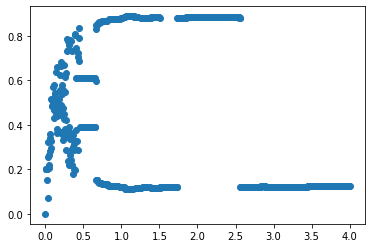

In [7]:
inputs = np.linspace(0, 4, 1000)
results = p_map(spectral_clustering, inputs)
fig, ax = plt.subplots()
ax.scatter(inputs, results)

In [8]:
sigma_star = inputs[np.argmax(results)]
accuracy = spectral_clustering(sigma_star)
print(f'Best Sigma is {sigma_star} with best accuracy {accuracy}')

Best Sigma is 1.0610610610610611 with best accuracy 0.8873563218390804


In [9]:
W = eta(dist, sigma_star)
    # compute Laplacian matrices 
d = np.sum(W, axis=1) # degree vector

D = np.diag(d)
Ds = np.diag(1/np.sqrt(d))

Ln = np.dot(Ds, np.dot((D - W),Ds)) # normalized
    # compute eigendecompositions 

    # we need to sort the eigenvalues and vectors 

lln, VVn = np.linalg.eigh(Ln)

idxn = lln.argsort()
Vn = VVn[:, idxn]

In [67]:
M = np.arange(1, 7, 1) #[2, 3, 4, 5, 6]
J = np.arange(1, 41, 1) #[5, 10, 20, 40]
results = []
def get_semi_supervised_accuracy(M, J):
  F = Vn[:, 0:M]
  A = F[0:J, 0:M]
  b = Y[0:J]
  SSLRidge = linear_model.Ridge(alpha = 1e-8, fit_intercept=False)
  SSLRidge.fit(A, b)

  coefficients = SSLRidge.coef_
  Y_pred = np.sign(np.dot(F, coefficients))

  accuracy = 1 - (1/435) * np.sum(Y_pred != Y)
  print(f'accuracy with M = {M} and J = {J}: {accuracy}')
  return accuracy

for i in M:
  temp_arr = []
  for j in J:
    temp_arr.append(get_semi_supervised_accuracy(i, j))
  results.append(temp_arr)

accuracy with M = 1 and J = 1: 0.38620689655172413
accuracy with M = 1 and J = 2: 0.38620689655172413
accuracy with M = 1 and J = 3: 0.38620689655172413
accuracy with M = 1 and J = 4: 0.38620689655172413
accuracy with M = 1 and J = 5: 0.38620689655172413
accuracy with M = 1 and J = 6: 0.38620689655172413
accuracy with M = 1 and J = 7: 0.38620689655172413
accuracy with M = 1 and J = 8: 0.38620689655172413
accuracy with M = 1 and J = 9: 0.38620689655172413
accuracy with M = 1 and J = 10: 0.38620689655172413
accuracy with M = 1 and J = 11: 0.38620689655172413
accuracy with M = 1 and J = 12: 0.38620689655172413
accuracy with M = 1 and J = 13: 0.38620689655172413
accuracy with M = 1 and J = 14: 0.38620689655172413
accuracy with M = 1 and J = 15: 0.38620689655172413
accuracy with M = 1 and J = 16: 0.38620689655172413
accuracy with M = 1 and J = 17: 0.38620689655172413
accuracy with M = 1 and J = 18: 0.38620689655172413
accuracy with M = 1 and J = 19: 0.38620689655172413
accuracy with M = 1 a

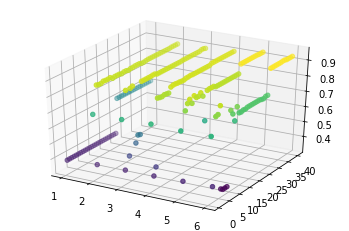

In [68]:
j, m = np.meshgrid(J, M)
ax = plt.axes(projection='3d')
ax.scatter3D(m, j, np.array(results), c=np.array(results));

In [69]:
test = np.argmax(np.array(results))
J_star = test % len(J) + 1
M_star =  int(test / len(J)) + 1
print(f'J = {test % len(J) + 1}')
print(f'M = {int(test / len(J)) + 1}')
print(f'accuracy is {np.array(results)[M_star - 1][J_star - 1]}')

J = 35
M = 6
accuracy is 0.9356321839080459
